<a href="https://colab.research.google.com/github/xiaocainiao5/myTensorflowStudyPlan/blob/master/1D_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [2]:
import numpy as np
import pandas as pd
x_train = np.load(r"/content/drive/My Drive/Xtrain.npy")
y_train = np.load(r"/content/drive/My Drive/ytrain.npy")
x_test = np.load(r"/content/drive/My Drive/Xtest.npy")
y_test = np.load(r"/content/drive/My Drive/ytest.npy")
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers,Input
from tensorflow.keras.models import Model



print(tf.__version__)#打印 TensorFlow 版本号。

gpus = tf.config.list_physical_devices(device_type='GPU')#获取系统中所有 GPU 设备的列表
print(gpus)
try:
    tf.config.experimental.set_memory_growth(gpus[0], True)#设置第一个 GPU 设备的显存增长为动态增长。
except:
    print('Error!')
    pass

2.12.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
# 导入后续需要使用到的相关包
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

# 导入对数据集进行相关处理的包
import numpy as np

import os

# 导入绘制图像相关的包
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# 设置一个随机种子，以保证程序的可重复性
# 相关知识：使用相同的随机数种子，能够保证每次实验所生成的随机数相同
myseed = 42069  
torch.backends.cudnn.deterministic = True   # 设置为True，保证每次训练使用的卷积算法一致
# 算法一致：算法运行在相同的软硬件的前提下，如果具有相同的输入，则输出相同
# Note：确定性算法往往比不确定性算法有更坏的性能表现

torch.backends.cudnn.benchmark = False      # 布尔值，为真将使cuDNN对多个卷积算法进行基准测试，并选择最快的算法。
# cuDNN 是英伟达专门为深度神经网络所开发出来的 GPU 加速库，针对卷积、池化等等常见操作做了非常多的底层优化
# 如果卷积网络结构不是动态变化的，网络的输入 (batch size，图像的大小，输入的通道) 是固定的，设置为True。由于本文并未涉及卷积运算，所以设置为False

# 设置numpy、torch、torch.cuda的随机数种子
np.random.seed(myseed)
torch.manual_seed(myseed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(myseed)

In [5]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((151, 1557, 1), (151, 1), (50, 1557, 1), (50, 1))

In [10]:
def built_model():
    INPUT = Input(shape=(1557,1))#使用 Keras 的 Input 函数创建一个输入层，输入层的形状为 (1557,1)，表示输入的数据维度为 1557。
    x = layers.Bidirectional(layers.LSTM(16,dropout=0.5))(INPUT)#双向LSTM
    x  = layers.Conv1D(8,3,activation = 'relu')(INPUT)#定义一个一维卷积层，卷积核数为 8，卷积核大小为 15，激活函数为 ReLU，该层的输入为 INPUT
    x = layers.MaxPooling1D()(x)#定义一个一维最大池化层，该层的输入为 x，并将该层的输出赋值给变量 x
    x  = layers.Conv1D(16,3,activation = 'relu')(x)
    x = layers.MaxPooling1D()(x)
    x  = layers.Conv1D(32,3,activation = 'relu')(x)
    # x = layers.MaxPooling1D()(x)
    x = layers.Flatten()(x)#定义一个扁平化层，将 x 的输出展平成一维张量

    y = layers.Dense(64,activation = 'relu')(x)#定义一个全连接层，神经元数为 64，激活函数为 ReLU，该层的输入为 x，并将该层的输出赋值给变量 y
    y = layers.Dense(1)(y)#定义一个全连接层，神经元数为 1，无激活函数，该层的输入为 y，并将该层的输出赋值给变量 y
    model = Model(INPUT, y)#使用 Keras 的 Model 函数将输入层 INPUT 和输出层 y 组合成一个完整的模型，并将该模型赋值给变量 model。
    return model

model = built_model()
model.summary()



Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1557, 1)]         0         
                                                                 
 conv1d_6 (Conv1D)           (None, 1555, 8)           32        
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 777, 8)           0         
 1D)                                                             
                                                                 
 conv1d_7 (Conv1D)           (None, 775, 16)           400       
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 387, 16)          0         
 1D)                                                             
                                                                 
 conv1d_8 (Conv1D)           (None, 385, 32)           1568

In [11]:
model.compile(loss='mse', optimizer='Adam', metrics=['mae'])#Keras 的 compile 方法编译模型，定义了模型的损失函数、优化器和评估指标

In [12]:
history = model.fit(x_train, y_train, batch_size=8,epochs=2000, verbose=1)#使用 Keras 的 fit 方法来训练模型，输入训练数据和训练参数，返回训练过程中的历史数据。

Epoch 1/2000
19/19 [==============================] - 12s 12ms/step - loss: 18.3957 - mae: 3.5167
Epoch 2/2000
19/19 [==============================] - 0s 4ms/step - loss: 2.7501 - mae: 1.2223
Epoch 3/2000
19/19 [==============================] - 0s 6ms/step - loss: 2.0433 - mae: 0.9596
Epoch 4/2000
19/19 [==============================] - 0s 7ms/step - loss: 1.8468 - mae: 0.9265
Epoch 5/2000
19/19 [==============================] - 0s 7ms/step - loss: 1.9874 - mae: 1.0288
Epoch 6/2000
19/19 [==============================] - 0s 6ms/step - loss: 1.9106 - mae: 0.9826
Epoch 7/2000
19/19 [==============================] - 0s 6ms/step - loss: 2.1226 - mae: 1.0475
Epoch 8/2000
19/19 [==============================] - 0s 6ms/step - loss: 1.8876 - mae: 0.9303
Epoch 9/2000
19/19 [==============================] - 0s 6ms/step - loss: 2.3104 - mae: 1.1275
Epoch 10/2000
19/19 [==============================] - 0s 6ms/step - loss: 2.3232 - mae: 1.0924
Epoch 11/2000
19/19 [=========================

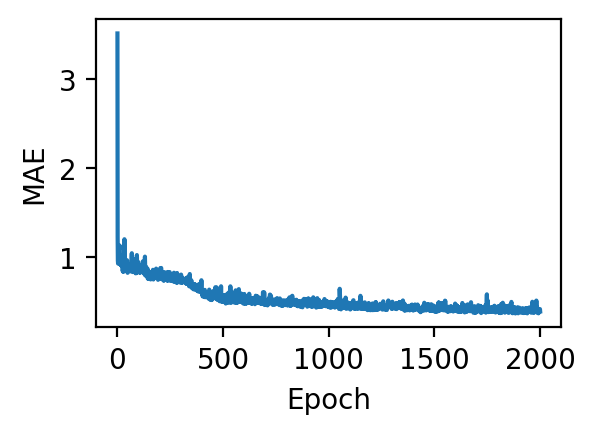

In [13]:
plt.figure(figsize=(3,2),dpi=200)
epoch_range = range(1, 2000+1)
plt.plot(epoch_range,history.history['mae'])
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.show()

In [14]:
model.save('model.h5')

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1557, 1)]         0         
                                                                 
 conv1d_6 (Conv1D)           (None, 1555, 8)           32        
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 777, 8)           0         
 1D)                                                             
                                                                 
 conv1d_7 (Conv1D)           (None, 775, 16)           400       
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 387, 16)          0         
 1D)                                                             
                                                                 
 conv1d_8 (Conv1D)           (None, 385, 32)           1568

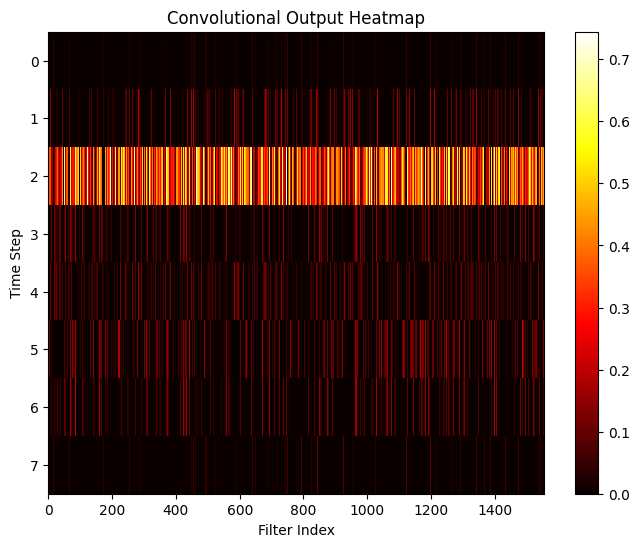

1/1 [==============================] - 0s 196ms/step


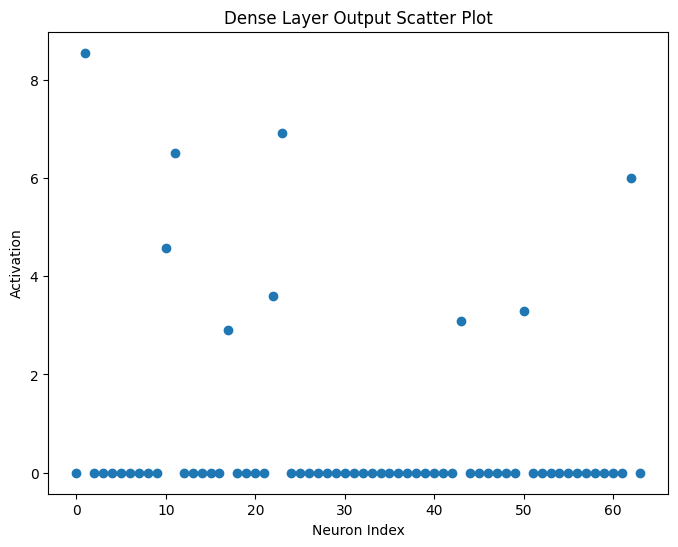

In [16]:
new_model = tf.keras.models.load_model('model.h5')#使用 Keras 的 load_model 方法加载之前训练好的模型，并使用 summary 方法输出模型的结构和参数信息。
new_model.summary()

import matplotlib.pyplot as plt

# 定义输入数据
input_data = np.random.rand(1, 1557, 1)

# 提取第一层卷积层的输出
conv_layer_output = new_model.get_layer('conv1d_6').output
conv_model = tf.keras.models.Model(inputs=new_model.input, outputs=conv_layer_output)

# 获取卷积层输出
conv_output = conv_model.predict(input_data)

# 绘制热力图
plt.figure(figsize=(8, 6))
plt.imshow(conv_output[0].T, cmap='hot', interpolation='nearest', aspect='auto')
plt.colorbar()
plt.title('Convolutional Output Heatmap')
plt.xlabel('Filter Index')
plt.ylabel('Time Step')
plt.show()

# 获取最后一层全连接层的输出
dense_layer_output = new_model.get_layer('dense_4').output
dense_model = tf.keras.models.Model(inputs=new_model.input, outputs=dense_layer_output)

# 获取全连接层输出
dense_output = dense_model.predict(input_data)

# 绘制散点图
plt.figure(figsize=(8, 6))
plt.scatter(range(dense_output.shape[1]), dense_output[0])
plt.title('Dense Layer Output Scatter Plot')
plt.xlabel('Neuron Index')
plt.ylabel('Activation')
plt.show()


1/1 [==============================] - 0s 44ms/step


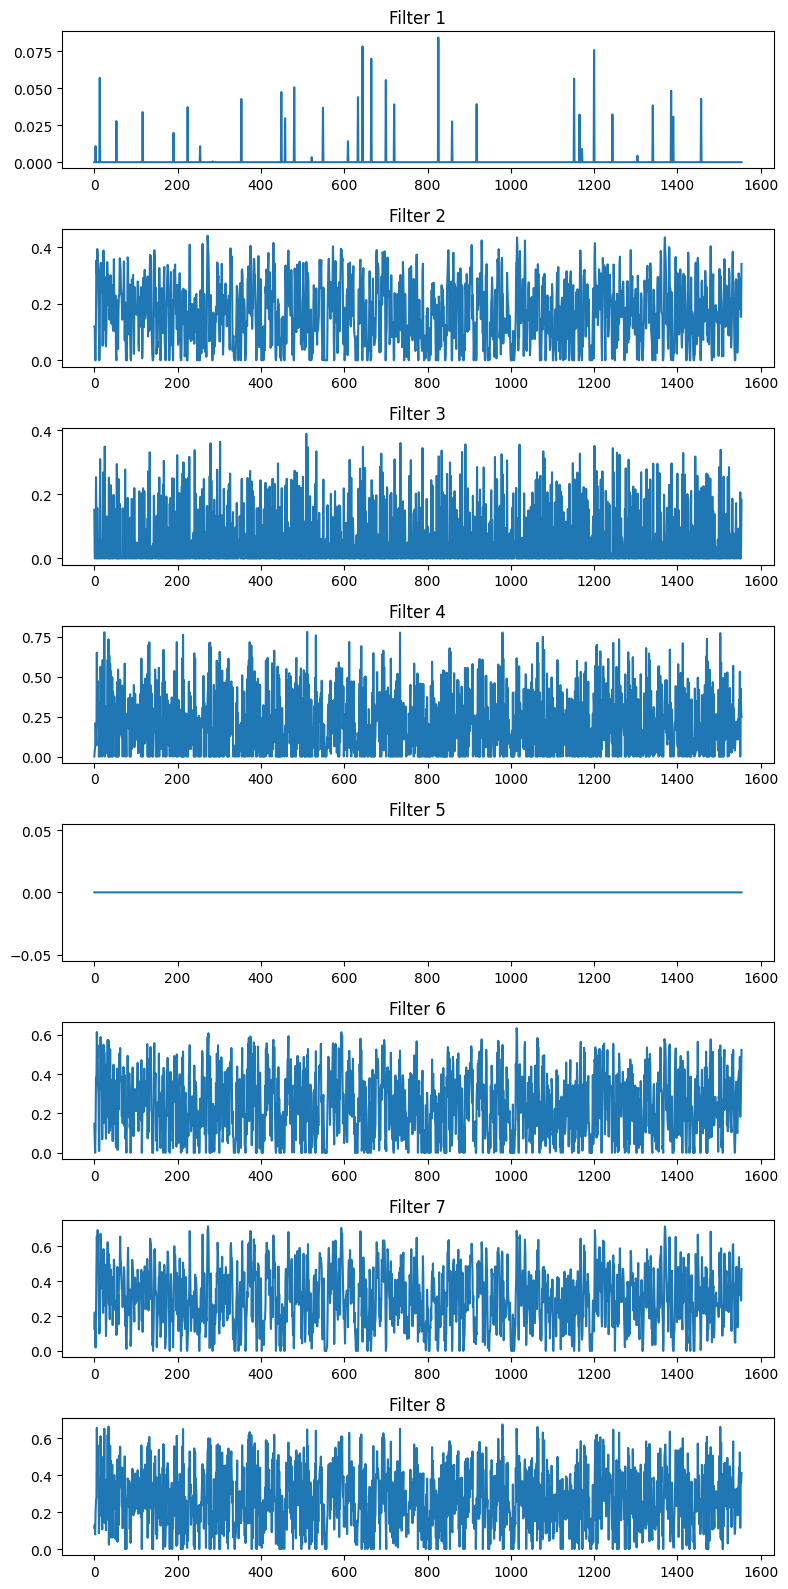

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import models

# 构建模型代码...

# 绘制卷积后的特征图
def plot_conv_outputs(model, input_data, layer_index):
    # 创建一个新的模型，该模型的输出为指定卷积层的输出
    conv_outputs_model = models.Model(inputs=model.input, outputs=model.layers[layer_index].output)

    # 获取指定卷积层的输出
    conv_outputs = conv_outputs_model.predict(input_data)

    # 调整特征图形状
    conv_outputs = np.squeeze(conv_outputs)

    # 可视化特征图
    fig, axs = plt.subplots(nrows=conv_outputs.shape[-1], figsize=(8, 2 * conv_outputs.shape[-1]))
    for i, ax in enumerate(axs):
        ax.plot(conv_outputs[:, i])
        ax.set_title('Filter {}'.format(i + 1))

    plt.tight_layout()
    plt.show()

# 输入数据
input_data = np.random.rand(1, 1557, 1)

# 绘制卷积后的特征图
plot_conv_outputs(model, input_data, layer_index=1)  # 选择要可视化的卷积层的索引



In [ ]:
test_mse_score, test_mae_score = model.evaluate(x_test, y_test)#使用 Keras 的 evaluate 方法来评估模型的性能，输入测试数据和测试参数，返回模型在测试集上的损失值和评估指标。具体解释如下：

print('loss:',test_mse_score)#模型在测试集上的均方误差
print('mae:',test_mae_score)#模型在测试集上的平均绝对误差

2/2 [==============================] - 0s 74ms/step - loss: 0.2102 - mae: 0.3623
loss: 0.21023620665073395
mae: 0.36234501004219055


2/2 [==============================] - 0s 71ms/step


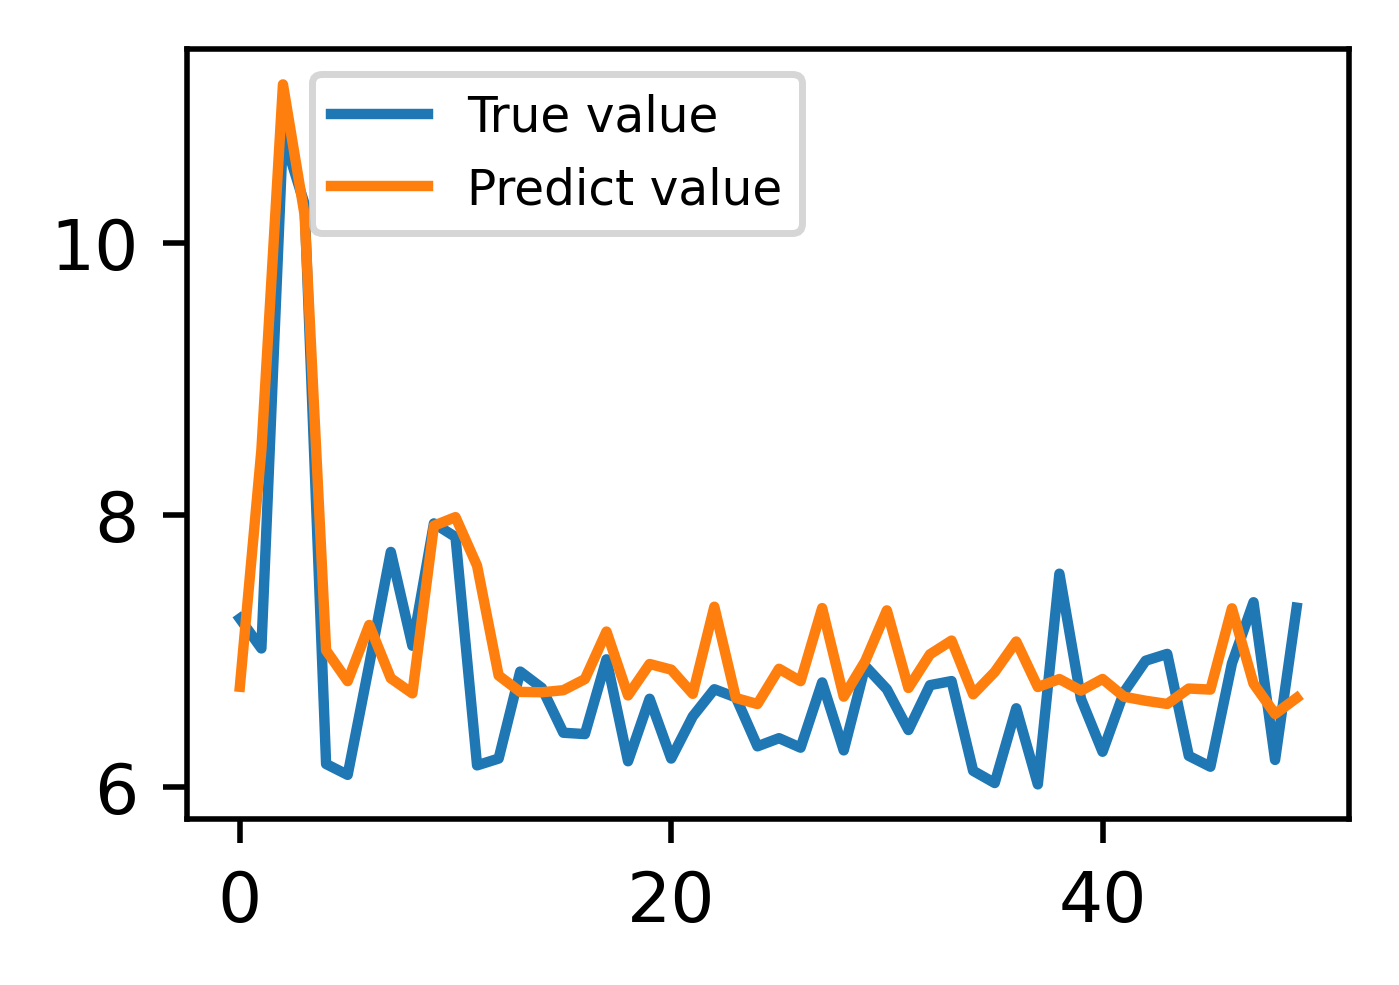

In [19]:
y_test_predict = model.predict(x_test)#使用已经训练好的 Keras 模型对测试集数据进行预测，返回预测结果。其中，x_test 是测试集的输入特征

plt.figure(figsize=(3,2),dpi=500)
plt.plot(y_test,label = 'True value')
plt.plot(y_test_predict,label = 'Predict value')
plt.legend(bbox_to_anchor=(0.55,1),fontsize=7)
# plt.savefig('/content/drive/My Drive',bbox_inches='tight')
plt.show()

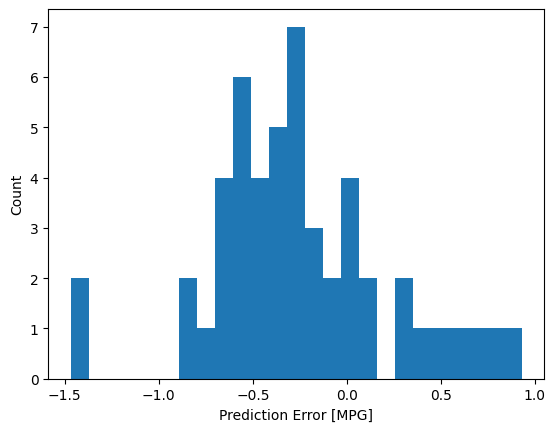

In [20]:
error = y_test - y_test_predict
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

In [ ]:
import numpy as np
rmse = np.sqrt(np.mean((np.array(y_test) - np.array(y_test_predict)) ** 2))
print(rmse)




0.4585152164426117


In [ ]:
import numpy as np
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_test_predict)
print(r2)

0.7378251166808851
